# <div  style="text-align:center;border-radius:50px;padding:18px;background-color:#02b6f7;color:#FFFFFF;font-family:'Elephant'">Welcome To PetroAnalyst Competition </div>

# **SECTION 01: Competition Rules**

> * The use of **artificial intelligence** is prohibited. Anyone who uses it will be subject to exclusion.
>
> * Anyone who is **one day late** in submitting the notebook will have two points deducted. If it is **more than one day late or if it is not submitted at all**, he will be subject to exclusion.
> 
> * Qualified persons will be announced **two days after** the end of the previous stage.
>
> * Any addition, whether a question & answer or a comment on their answer, will earn the person **bouns points**.
>
> * There are **points on the format of the answer and the shape of the plots** to make them more clear.
>
> * Send Your Notebook with name **'Notebook_01_Comptitor_Name'**. For Example **'Notebook_01_Mahmoud_Mohamed'**

# **SECTION 02: Competition Stages**

> * **Stage One**: Well logging and Core Analysis
>
> * **Stage Two**: Survey Data and Decline Curve Analysis
>
> * **Stage Three**: Streamlit Application

# **SECTION 03: Notebook 02**

In this notebook, we take a brief vision on some important topics in oil and gas industry including:
* Survey Data [click here](https://www.helmerichpayne.com/resources/product-highlights/drilling-surveys-strategies-for-precise-wellbore-surveys-and-placement#:~:text=Survey%20reports%20are%20detailed%20documents,When%20each%20survey%20was%20taken.)

* Decline Curve Analysis Techniques [click here](https://www.ihsenergy.ca/support/documentation_ca/Harmony/content/html_files/reference_material/analysis_method_theory/decline_theory.htm)

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 01</br></br>Survey Data</div>

# Welly Location Data Plotting

## **Exercise 01**: Importing Libraries & Las Data

**Use File** 'L05-15-Spliced.las'

In [1]:
import pandas as pd
import numpy as np
import lasio
import openpyxl
from welly import Well
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings("ignore")
from welly import Location
import welly

In [2]:
las = lasio.read("L05-15-Spliced.LAS")

## **Exercise 02**: Display the entire range of curves available in the dataset in one plot.
</br>**Make it in prefect form (the more good your chart the more points you will get)**

*Method 1: using for loop.*

In [3]:
df= las.df()
df = df.reset_index()
df.head()

,DEPT,BHT,CAL,CHT,CN,CNC,CNCQH,CNQH,DEPTH,GR,...,PORZ,PORZC,TEN,TTEN,WTBH,ZCORQH,ZDEN,ZDENQH,ZDNC,ZDNCQH
0,2772.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2772.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2773.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,87.943,NaN,NaN,NaN,NaN,NaN
3,2773.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,88.166,NaN,NaN,NaN,NaN,NaN
4,2773.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,88.252,NaN,NaN,NaN,NaN,NaN


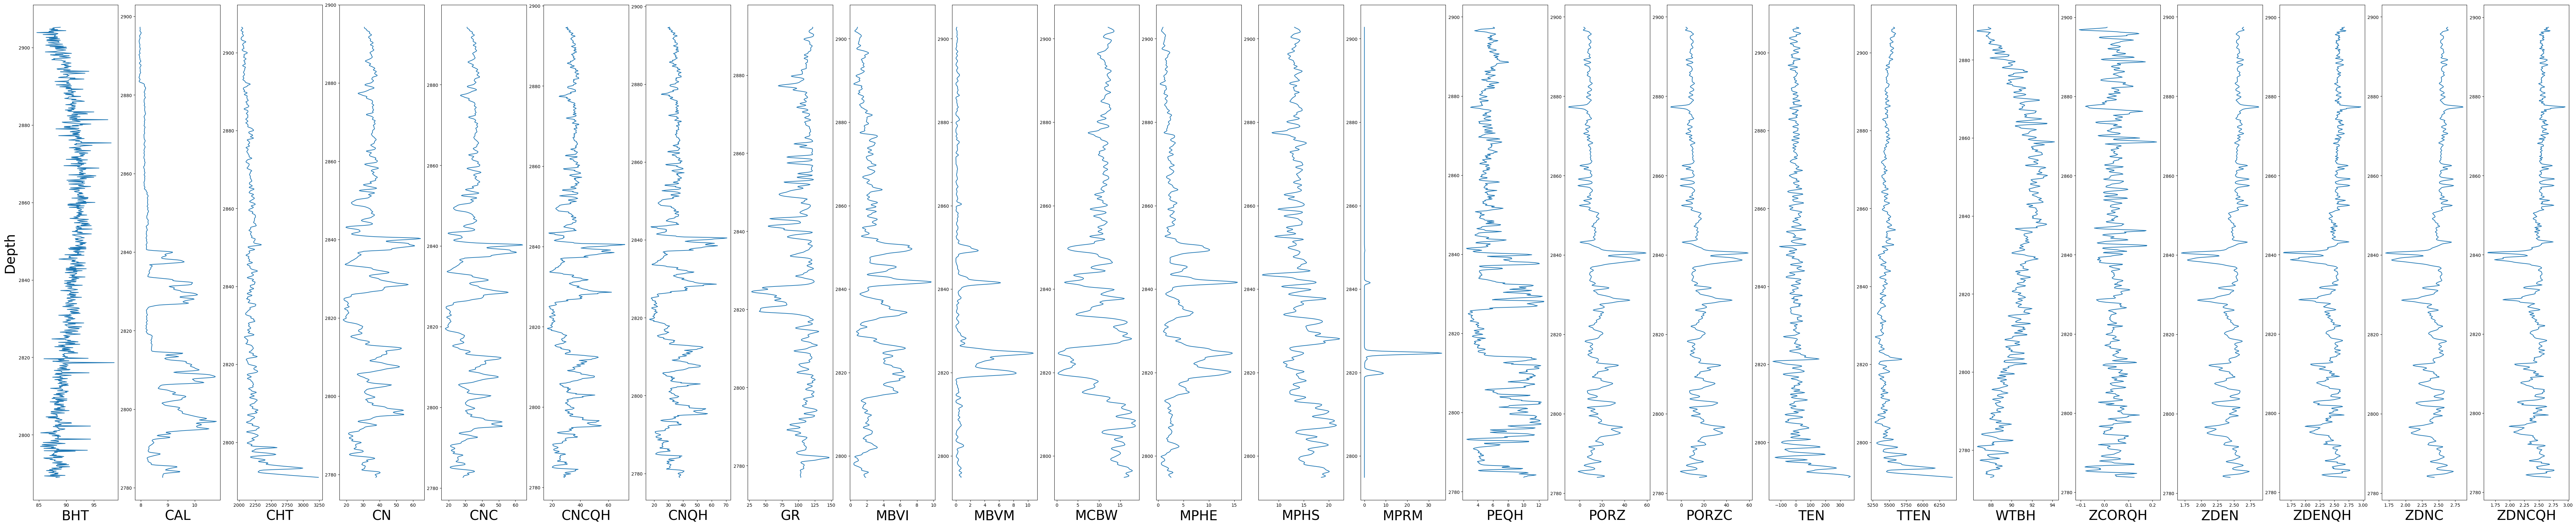

In [4]:
list = ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH',
       'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ',
       'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC',
       'ZDNCQH']
plt.figure(figsize=(110, 20))
for i in range(len(list)):
    plt.subplot(1, 27,i+1)
    plt.xlabel(f"{list[i]}",size=30)
    if i < 1:
      plt.ylabel('Depth',size=30)
    plt.plot(df[list[i]],df['DEPT'])

*Method 2: using library welly.*

In [5]:
dfnew = Well.from_las('L05-15-Spliced.LAS')

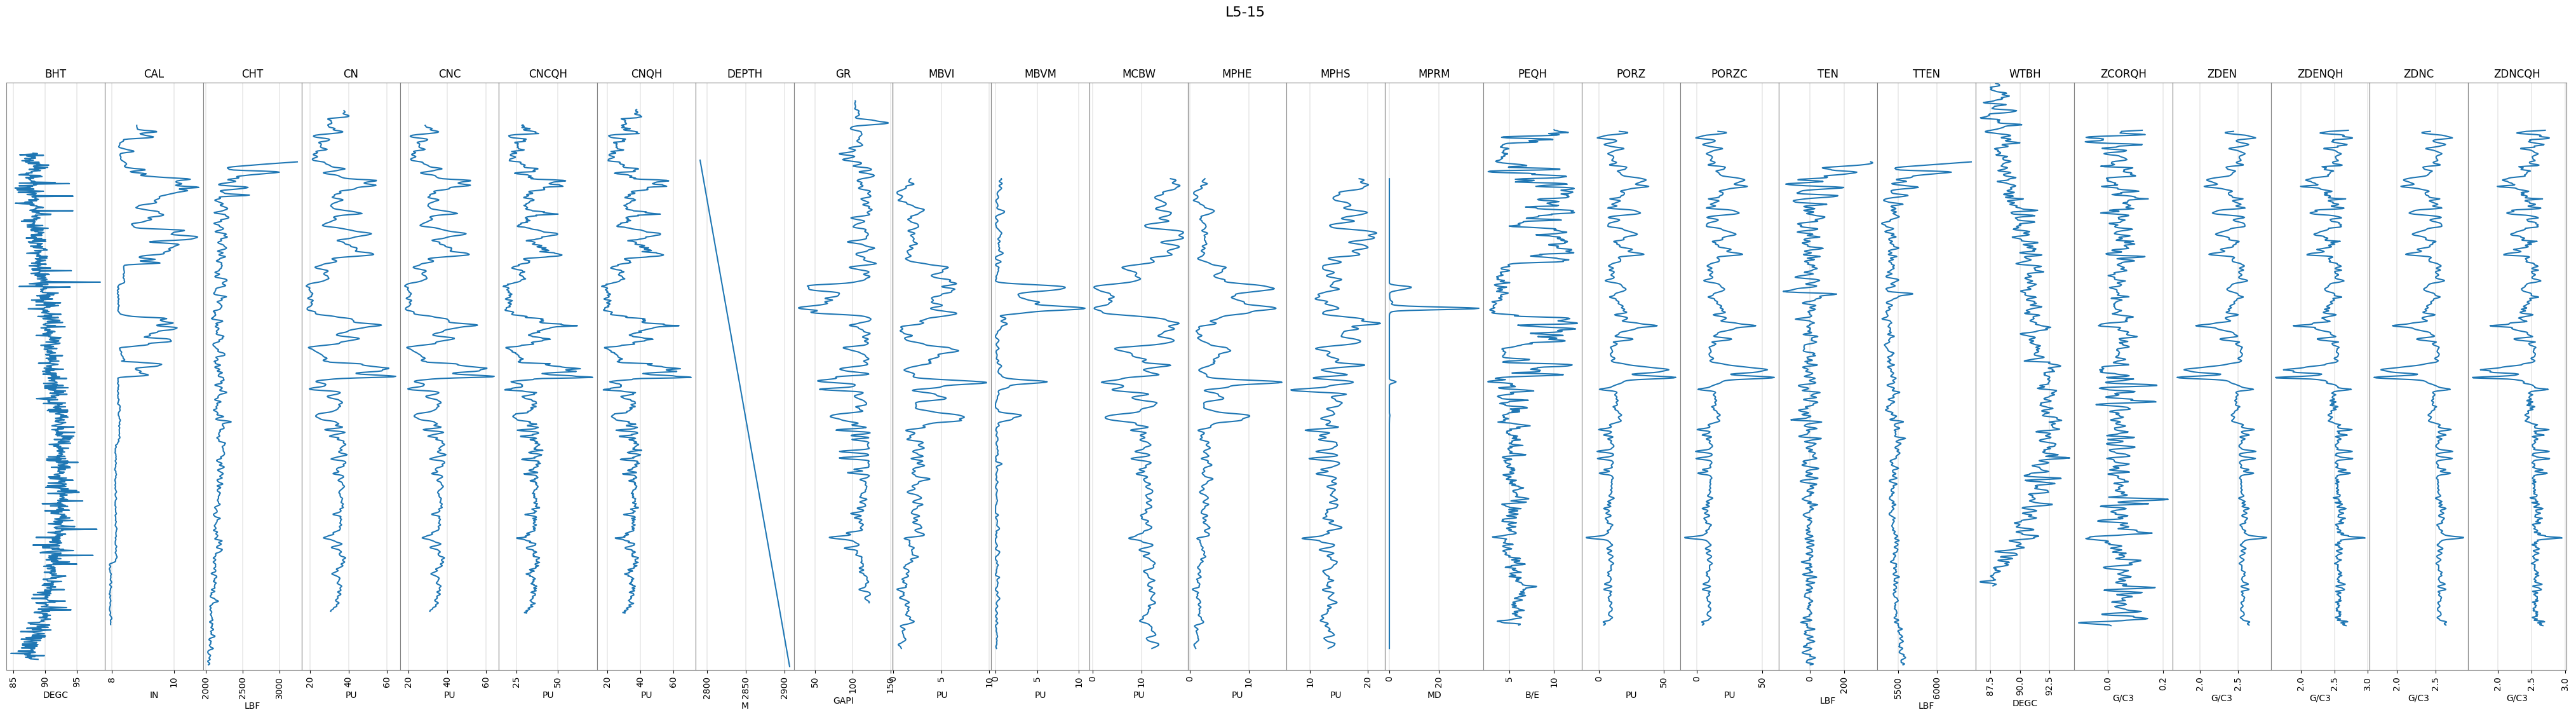

In [70]:
dfnew.plot(extents='curves')

## **Exercise 03**: Importing Survey Data
Survey data is commonly measured at irregular intervals during the drilling process. It gives a snapshot of the measured depth, inclination and azimuth at the time of the survey. From this, we can calculated the True Vertical Depth, x-offset and y-offset from the origin point of the well.
</br>
</br>**Use File** 'L05-15-Survey.csv'

In [7]:
df = pd.read_csv('L05-15-Survey.csv')
df.head()

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.0,0.00,0.00,0.00,0.00,0.00
1,89.3,0.00,0.00,89.30,0.00,0.00
2,142.1,2.31,323.48,142.09,-0.63,0.86
3,170.2,3.89,319.12,170.14,-1.59,2.03
4,197.9,5.86,315.60,197.74,-3.20,3.75


## **Exercise 04**: Subset Data
Welly requires the survey data to contain MD - measured depth, INC - inclination and AZI - azimuth. This allows the library to calculate the TVD, X-offset and Y-offset.

In [8]:
df.columns

Index(['MD', 'INC', 'AZI', 'TVD', 'X-offset', 'Y-offset'], dtype='object')

In [9]:
svdata = df[['MD', 'INC', 'AZI']]
svdata.head()

,MD,INC,AZI
0,0.0,0.00,0.00
1,89.3,0.00,0.00
2,142.1,2.31,323.48
3,170.2,3.89,319.12
4,197.9,5.86,315.60


## Adding Survey Data to Welly Well
After the survey data has been loaded from a CSV file, we need to calculate our location parameters. By default welly is set to calculate these using the minimum curvature method, which is the most common and most accurate method for this purpose. More information can be found at https://petrowiki.spe.or.

## **Exercise 05**: Add deviation data to a well

In [10]:
dfnew.location.add_deviation(svdata.values)

In [11]:
df = dfnew.location.position

In [12]:
df = pd.DataFrame(df,columns=['X', 'Y', 'Z'])

## **Exercise 06**: Creating Location Plots
To understand the position of the well, we can call upon three plots.  </br>
* The first plots the x and y offset and gives us a top down view / map view of the well path.  
* The next two plots show us how the well changes in the x location versus TVD and the y location versus TVD.
</br>
</br> - Make the three plots
</br> - add a couple of markers to our plot to show the starting location and the end location of the well.  
</br> - Additionally, for the plots with TVD, we can understand them better if we invert the y-axis using 

In [13]:
df.head()

,X,Y,Z
0,0.0000000000,0.0000000000,0.0000000000
1,0.0000000000,0.0000000000,89.3000000000
2,-0.6333253044,0.8552654956,142.0856970352
3,-1.5942222866,2.0311229849,170.1437254390
4,-3.1986952387,3.7520170334,197.7422205382


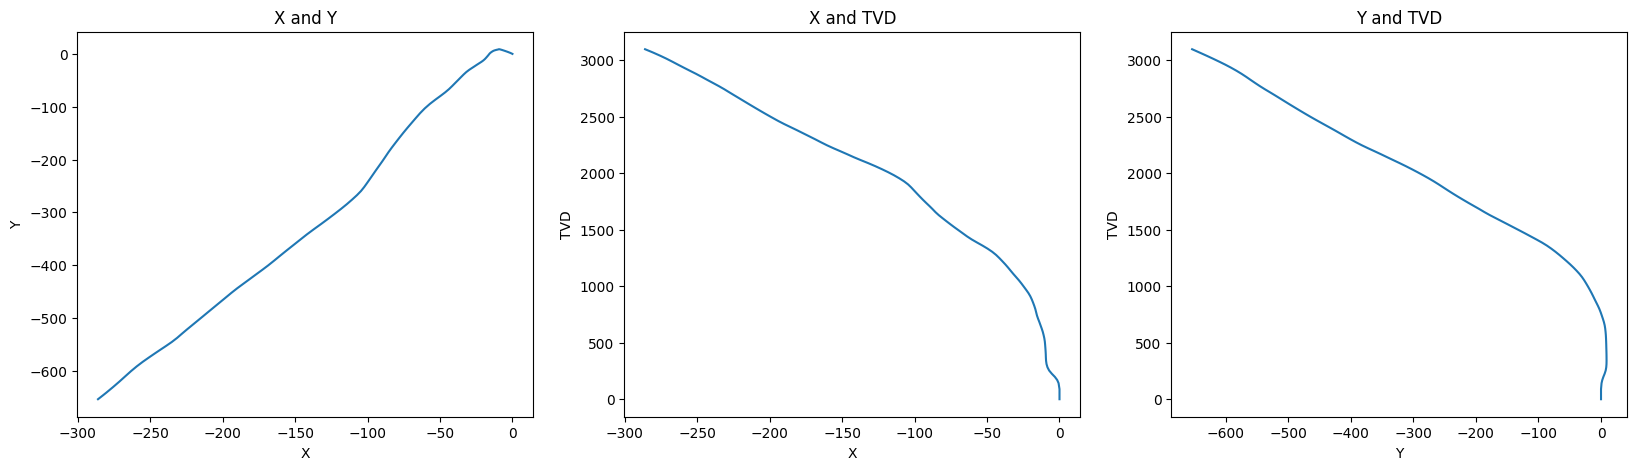

In [14]:
list = ['X','Y','Z']
plt.figure(figsize=(20, 5))
#==============================
#Subplot 1
plt.subplot(1, 3, 1)
plt.title('X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(df['X'],df['Y'])
#==============================
#Subplot 2
plt.subplot(1, 3, 2)
plt.title('X and TVD')
plt.xlabel('X')
plt.ylabel('TVD')
plt.plot(df['X'],df['Z'])
#==============================
#Subplot 3
plt.subplot(1, 3, 3)
plt.title('Y and TVD')
plt.xlabel('Y')
plt.ylabel('TVD')
plt.plot(df['Y'],df['Z'])

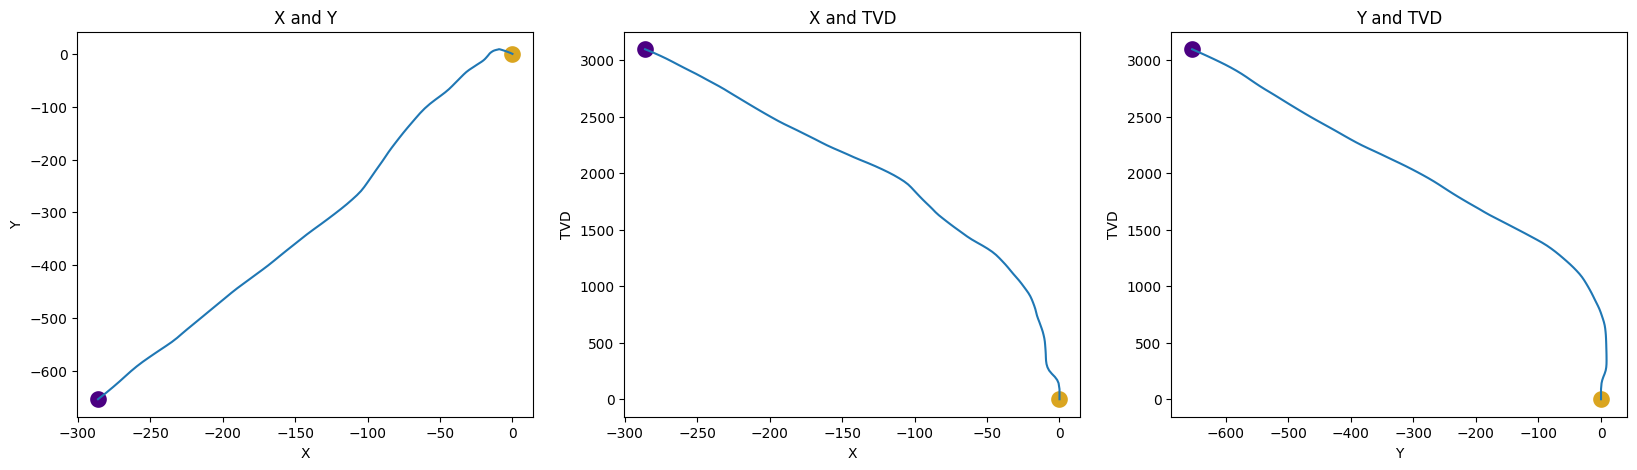

In [15]:
#==============================
#Function to add markers
def marker(x,y):
  plt.scatter([df[x].iloc[0]], [df[y].iloc[0]],color='goldenrod',linewidth=6)
  plt.scatter([df[x].iloc[-1]], [df[y].iloc[-1]],color="indigo",linewidth=6)
plt.figure(figsize=(20, 5))
#==============================
#Subplot 1
plt.subplot(1, 3, 1)
plt.title('X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(df['X'],df['Y'])
marker('X','Y')
#==============================
#Subplot 2
plt.subplot(1, 3, 2)
plt.title('X and TVD')
plt.xlabel('X')
plt.ylabel('TVD')
plt.plot(df['X'],df['Z'])
marker('X','Z')
#==============================
#Subplot 3
plt.subplot(1, 3, 3)
plt.title('Y and TVD')
plt.xlabel('Y')
plt.ylabel('TVD')
plt.plot(df['Y'],df['Z'])
marker('Y','Z')

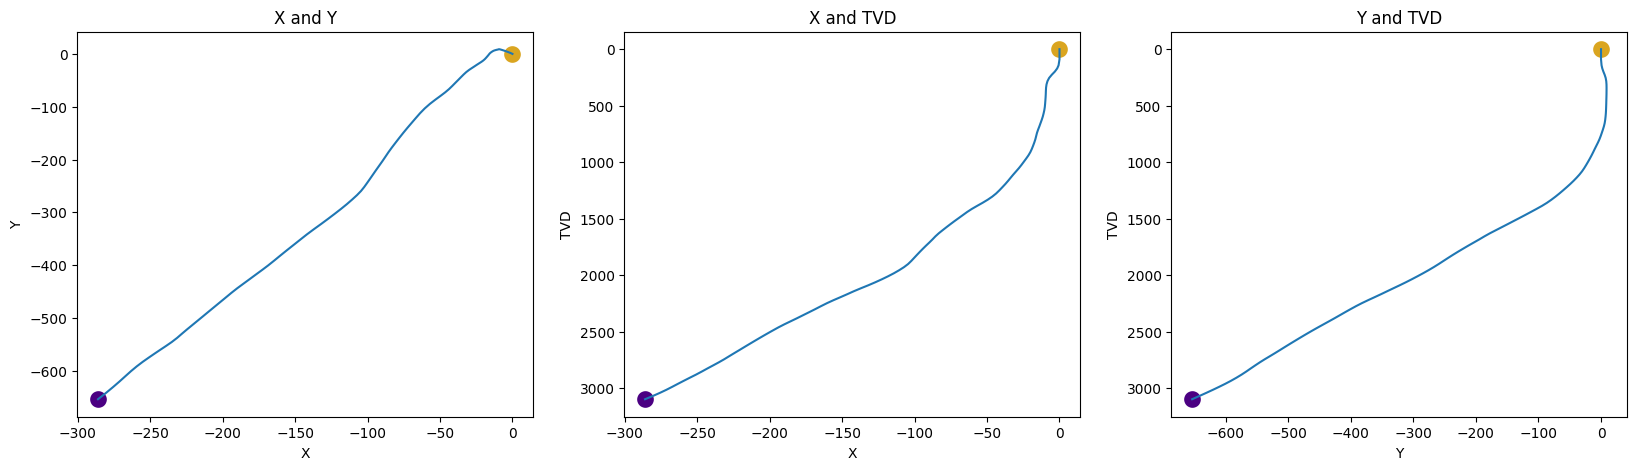

In [16]:
plt.figure(figsize=(20, 5))
#==============================
#Subplot 1
plt.subplot(1, 3, 1)
plt.title('X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(df['X'],df['Y'])
marker('X','Y')
#==============================
#Subplot 2
plt.subplot(1, 3, 2)
plt.title('X and TVD')
plt.xlabel('X')
plt.ylabel('TVD')
plt.plot(df['X'],df['Z'])
plt.gca().invert_yaxis()
marker('X','Z')
#==============================
#Subplot 3
plt.subplot(1, 3, 3)
plt.title('Y and TVD')
plt.xlabel('Y')
plt.ylabel('TVD')
plt.plot(df['Y'],df['Z'])
plt.gca().invert_yaxis()
marker('Y','Z')

## **Exercise 07**: Create 3D Plot of Well Path
Rather than viewing the data in two dimensions, we can view it in three dimensions using matplotlib. But first we have to calculate continuous data. This is done by using `location.trajectory()`. Here we can provide a datum, i.e the UTM co-ordinates of the well location at surface, and a vertical offset.
</br>**Note:** Create a trajectory of regularly sampled points datum=[589075.56, 5963534.91, 0]

In [17]:
df = dfnew.location.trajectory(datum=[589075.56, 5963534.91, 0], elev=False)

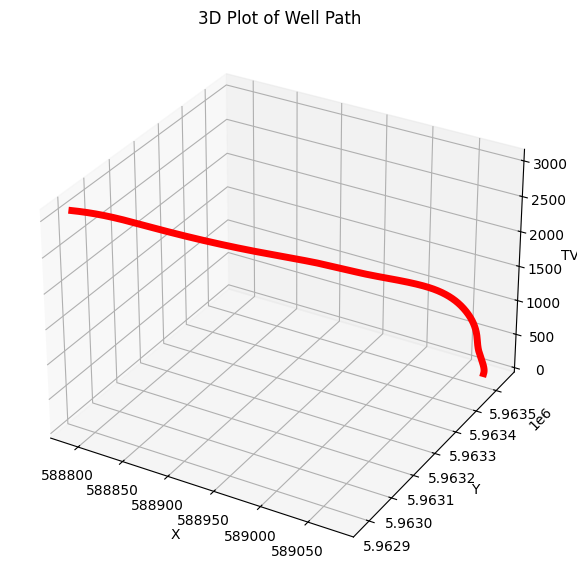

In [18]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.plot3D(df[:,0], df[:,1], df[:,2],color='red', linewidth=5)
ax.set_title('3D Plot of Well Path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('TVD') 
plt.show()

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 02</br></br>Decline Curve Analysis</div>

# <span style="font-weight:800"> DCA Using python

in this notebook you will apply all the 3 models `exponential/harmonic/hyperbolic` to any well of your choice but not the one used in the videos

## **Exercise 08**: <span style="font-weight:800"> Data preparing 
- in this section do the following 
    1. load the data and reduce the data to only one well ("15/9-F-14")
    2. remove the outliers in the oil production data 
    3. smoothe the oil production column
   
**Use File** 'Volve production data.xlsx'

In [19]:
df = pd.read_excel('Volve production data.xlsx')
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [20]:
df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

*DONE - load the data and reduce the data to only one well ("15/9-F-14")*

In [21]:
df = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']

##### **Now beginning in data cleaning**

*There are nulls in (AVG_ANNULUS_PRESS, AVG_CHOKE_SIZE_P, BORE_WI_VOL).*

In [22]:
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS            523
AVG_CHOKE_SIZE_P             196
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

*We will completely delete the [BORE_WI_VOL] column, and then we will delete the 523 value in [AVG_ANNULUS_PRESS] and then We will fill the [AVG_CHOKE_SIZE_P] with the median.*

In [23]:
df.shape

(3056, 24)

In [24]:
df = df.drop('BORE_WI_VOL', axis=1)
df = df.dropna(subset=['AVG_ANNULUS_PRESS'])
df = df.fillna(df['AVG_CHOKE_SIZE_P'].median())

*Our data has been cleaned*

In [25]:
print(df.isnull().sum())
print(df.shape)

DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64
(2533, 23)


In [26]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATEPRD,2533,2013-01-19 20:07:29.111725312,2008-02-12 00:00:00,2011-04-28 00:00:00,2013-03-22 00:00:00,2014-12-24 00:00:00,2016-09-17 00:00:00,NaN
NPD_WELL_BORE_CODE,2533.0,5351.0,5351.0,5351.0,5351.0,5351.0,5351.0,0.0
NPD_FIELD_CODE,2533.0,3420717.0,3420717.0,3420717.0,3420717.0,3420717.0,3420717.0,0.0
NPD_FACILITY_CODE,2533.0,369304.0,369304.0,369304.0,369304.0,369304.0,369304.0,0.0
ON_STREAM_HRS,2533.0,20.2875530557,0.0,24.0,24.0,24.0,25.0,8.1851054755
AVG_DOWNHOLE_PRESSURE,2533.0,233.7151552479,0.0,241.7161433333,249.5720072917,264.2387,334.65614,68.3275594811
AVG_DOWNHOLE_TEMPERATURE,2533.0,93.8513858568,0.0,99.5732920833,100.2351735417,103.2928795833,106.7727333333,26.9214077507
AVG_DP_TUBING,2533.0,198.9010724273,0.0,197.4854923404,209.6472302083,230.8680260417,302.10976,60.1392432651
AVG_ANNULUS_PRESS,2533.0,10.5279841172,0.0,0.0,12.9686333333,21.2318433333,26.6822425,9.7046044731
AVG_CHOKE_SIZE_P,2533.0,77.4476851677,0.0,59.0902247619,97.9166666667,100.0,100.0,29.6647143291


In [27]:
df['BORE_OIL_VOL'].describe()

count    2533.0000000000
mean      898.3334859850
std       905.9886349334
min         0.0000000000
25%       187.0400000000
50%       597.1300000000
75%      1360.5700000000
max      5453.8400000000
Name: BORE_OIL_VOL, dtype: float64

In [28]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
4967,2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.05885,0.0,0.0,0.0,production,OP
4968,2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.06768,0.0,0.0,0.0,production,OP
4969,2008-02-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.04950,0.0,0.0,0.0,production,OP
4970,2008-02-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.06640,0.0,0.0,0.0,production,OP
4971,2008-02-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.10479,0.0,0.0,0.0,production,OP


In [29]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
4967,2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.05885,0.0,0.0,0.0,production,OP
4968,2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.06768,0.0,0.0,0.0,production,OP
4969,2008-02-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.04950,0.0,0.0,0.0,production,OP
4970,2008-02-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.06640,0.0,0.0,0.0,production,OP
4971,2008-02-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,97.9166666667,%,0.0,0.0,0.10479,0.0,0.0,0.0,production,OP


In [30]:
df['DATEPRD'].unique()

<DatetimeArray>
['2008-02-12 00:00:00', '2008-02-13 00:00:00', '2008-02-14 00:00:00',
 '2008-02-15 00:00:00', '2008-02-16 00:00:00', '2008-02-17 00:00:00',
 '2008-02-18 00:00:00', '2008-02-19 00:00:00', '2008-02-20 00:00:00',
 '2008-02-21 00:00:00',
 ...
 '2016-09-08 00:00:00', '2016-09-09 00:00:00', '2016-09-10 00:00:00',
 '2016-09-11 00:00:00', '2016-09-12 00:00:00', '2016-09-13 00:00:00',
 '2016-09-14 00:00:00', '2016-09-15 00:00:00', '2016-09-16 00:00:00',
 '2016-09-17 00:00:00']
Length: 2533, dtype: datetime64[ns]

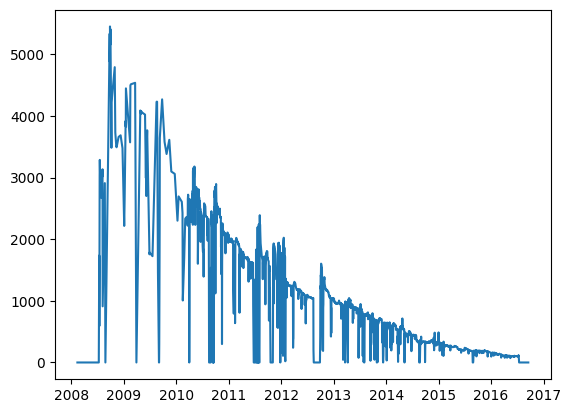

In [31]:
plt.plot(df['DATEPRD'], df['BORE_OIL_VOL'])
plt.show()

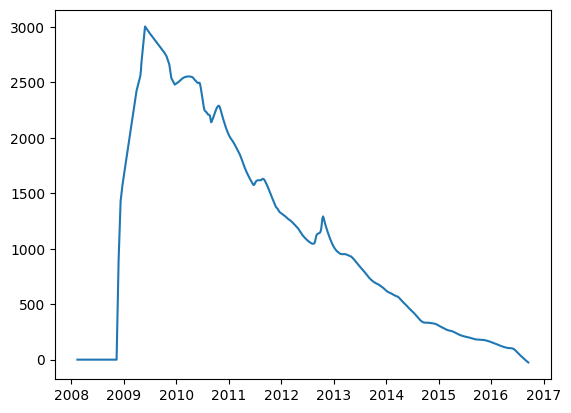

In [32]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(df['BORE_OIL_VOL'],df['DATEPRD'].astype('int64'), frac=0.05)
lowsX, lowsY = lowess.T
lowsX = pd.to_datetime(lowsX)
plt.plot(lowsX, lowsY, label="Lowess Method")
plt.show()

In [33]:
newcolumn = lowess[:, 1]
df['BOV Smoothed'] = newcolumn

In [34]:
df[['BORE_OIL_VOL','BOV Smoothed']].describe().T

,count,mean,std,min,25%,50%,75%,max
BORE_OIL_VOL,2533.0,898.3334859850,905.9886349334,0.0000000000,187.0400000000,597.1300000000,1360.5700000000,5453.8400000000
BOV Smoothed,2533.0,909.4383364667,780.3987798121,-25.4221337271,212.3164220236,714.0313302961,1426.7037005835,3004.3193922549


## **Exercie 09**: <span style="font-weight:800"> Exponential model
- apply the exponential model and get the parameters using curve fitting `scipy.optimize.curve_fit`
- show the result of the fitted model using visualization:
    - `X-axis`: time in days
    - `y-axis` : the smoothed data and the line represents the model
    - print the model parameter `nicely formated`

In [35]:
from scipy.optimize import curve_fit

In [36]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE,BOV Smoothed
4967,2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.05885,0.0,0.0,0.0,production,OP,0.0
4968,2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.06768,0.0,0.0,0.0,production,OP,0.0
4969,2008-02-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.04950,0.0,0.0,0.0,production,OP,0.0
4970,2008-02-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.06640,0.0,0.0,0.0,production,OP,0.0
4971,2008-02-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.10479,0.0,0.0,0.0,production,OP,0.0


In [37]:
df['day'] = range(0, len(df))

In [38]:
x_data = df['day'].to_numpy()
y_data = df['BOV Smoothed'].to_numpy()

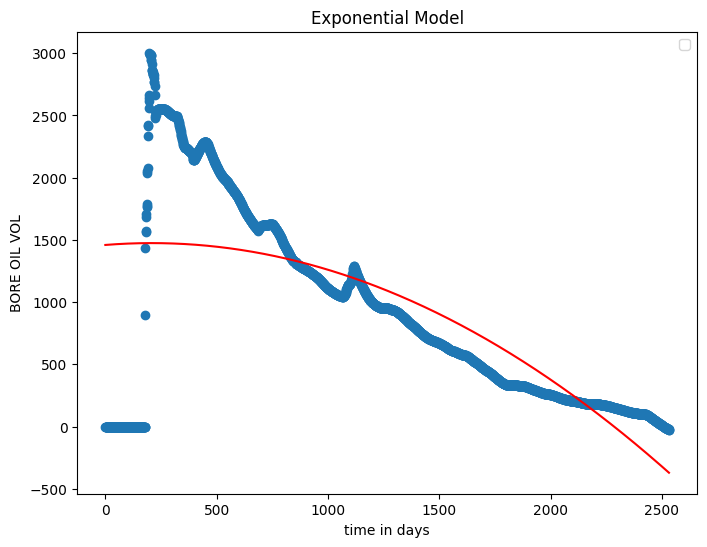

Exponential Model Parameters:
a: -0.0003418457806677815
b: 208.63125176411256
c: 1474.4077709635467


In [39]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c
#=======================================================
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])
a_opt, b_opt ,c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 500)
y_model = model_f(x_model, a_opt, b_opt, c_opt)
#=======================================================
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model,color="red")
plt.xlabel("time in days")
plt.ylabel("BORE OIL VOL") 
plt.title("Exponential Model")
plt.legend()
plt.show()
print(f"Exponential Model Parameters:")
print(f"a: {a_opt}")
print(f"b: {b_opt}")
print(f"c: {c_opt}")

## **Exercise 10**: <span style="font-weight:800"> Harmonic model
- apply the Harmonic model and get the parameters using curve fitting `scipy.optimize.curve_fit`
- show the result of the fitted model using visualization:
    - `X-axis`: time in days
    - `y-axis` : the smoothed data and the line represents the model
    - print the model parameter `nicely formated`

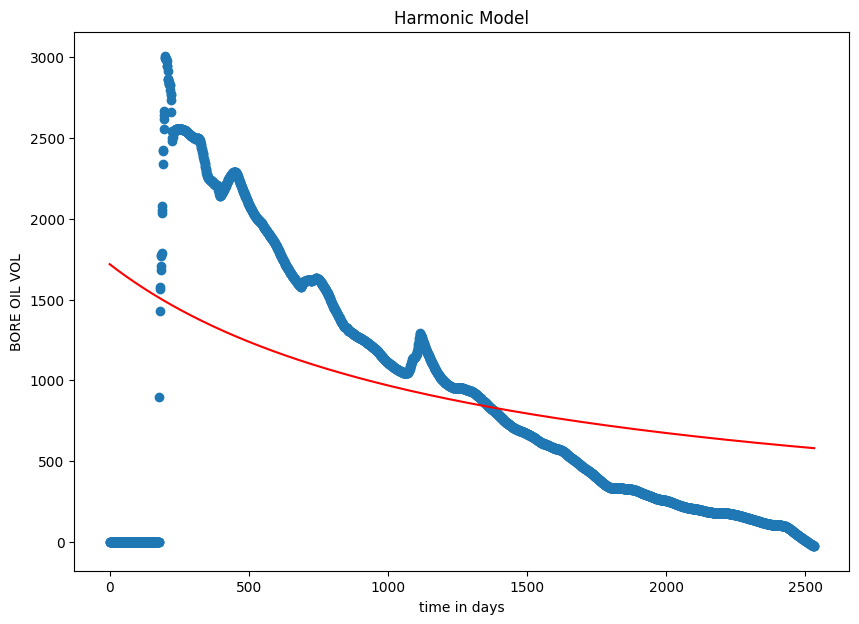

Harmonic Model Parameters:
qi: 1718.6099691942873
Di: 0.0007739922143527918


In [40]:
def harmonic_decline(x, qi, Di):
    return qi / (1 + Di * x)
#=======================================================
popt_harmonic, pcov_harmonic = curve_fit(harmonic_decline, x_data, y_data, p0=[3000, 0.001])
qi_harm, Di_harm = popt_harmonic
x_model = np.linspace(min(x_data), max(x_data), 500)
y_harmonic = harmonic_decline(x_model, qi_harm, Di_harm)
#=======================================================
plt.figure(figsize=(10, 7))
plt.scatter(x_data, y_data)
plt.plot(x_model, y_harmonic, color="red")
plt.xlabel("time in days")
plt.ylabel("BORE OIL VOL")
plt.title("Harmonic Model")
plt.show()
print("Harmonic Model Parameters:")
print(f"qi: {qi_harm}")
print(f"Di: {Di_harm}")

## **Exercise 11**: <span style="font-weight:800"> Hyperbolic model
- apply the Hyperbolic model and get the parameters using curve fitting `scipy.optimize.curve_fit`
- show the result of the fitted model using visualization:
    - `X-axis`: time in days
    - `y-axis` : the smoothed data and the line represents the model
    - print the model parameter `nicely formated`

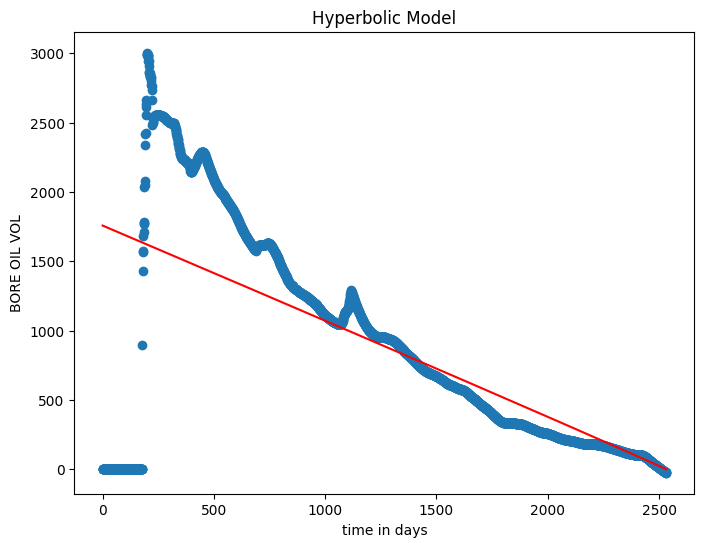

Hyperbolic Model Parameters:
qi: 1757.5058756567946
Di: 0.0003893799023805805
b : -1.014291291410216


In [41]:
#=======================================================
def hyperbolic_decline(x, qi, Di, b):
    return qi / (1 + b * Di * x)**(1/b)
#=======================================================
popt, pcov = curve_fit(hyperbolic_decline, x_data, y_data, p0=[3000, 0.001, 0.5])
qi_opt, Di_opt, b_opt = popt 
#=======================================================
x_model = np.linspace(min(x_data), max(x_data), 500)
y_model = hyperbolic_decline(x_model, qi_opt, Di_opt, b_opt)
#=======================================================
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data,)
plt.plot(x_model, y_model,color="red")
plt.xlabel("time in days")
plt.ylabel("BORE OIL VOL") 
plt.title("Hyperbolic Model")
plt.show()
print("Hyperbolic Model Parameters:")
print(f"qi: {qi_opt}")
print(f"Di: {Di_opt}")
print(f"b : {b_opt}")


# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 03</br></br>Estimated Ultimate Recovery</div>

## **Exercise 12**: <span style="font-weight:800"> Hyperbolic model
- in this section do the following 
    1. load the data and reduce the data to only one well ("15/9-F-14")
    2. remove the outliers in the Gas production data 
    3. smoothe the Gas production column
- apply the Hyperbolic model and get the parameters
- show the result of the fitted model using visualization:
    - `X-axis`: cumulative production  
    - `y-axis` : the smoothed data and the line represents the model
    - print the model parameter `nicely formated`
- Given The following:
    - window in rolling function = 10
    - Filter data based on:
        - 'BORE_GAS_VOL' greater than 0
        - 'DATEPRD' up to end of 2010
    - Economical Gas Rate Limit is 16500
    
    
**Use File** 'Volve production data.xlsx'    

In [42]:
df = pd.read_excel('Volve production data.xlsx')
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [43]:
df = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS            523
AVG_CHOKE_SIZE_P             196
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [44]:
df = df.drop('BORE_WI_VOL', axis=1)
df = df.dropna(subset=['AVG_ANNULUS_PRESS'])
df = df.fillna(df['AVG_CHOKE_SIZE_P'].median())
df = df[df['BORE_GAS_VOL'] > 0]
df = df[df['DATEPRD'] <= '2010-12-31']

In [45]:
df.shape

(354, 23)

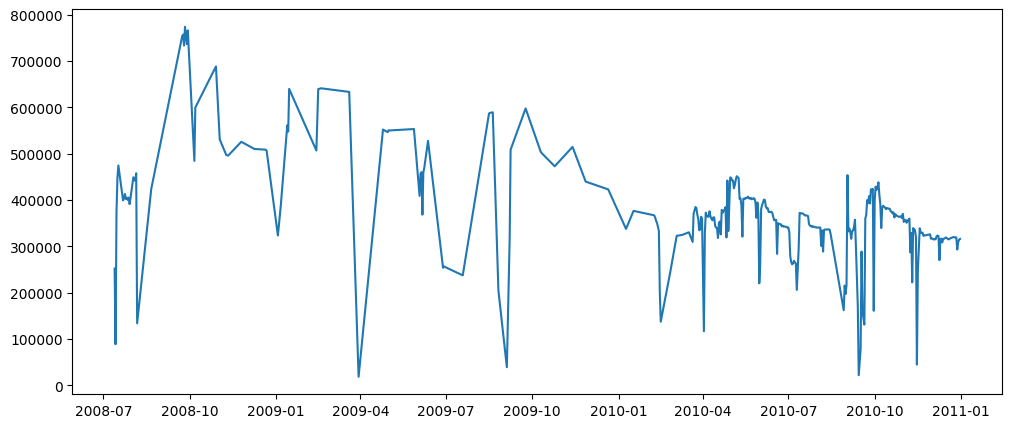

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(df['DATEPRD'], df['BORE_GAS_VOL'])
plt.show()

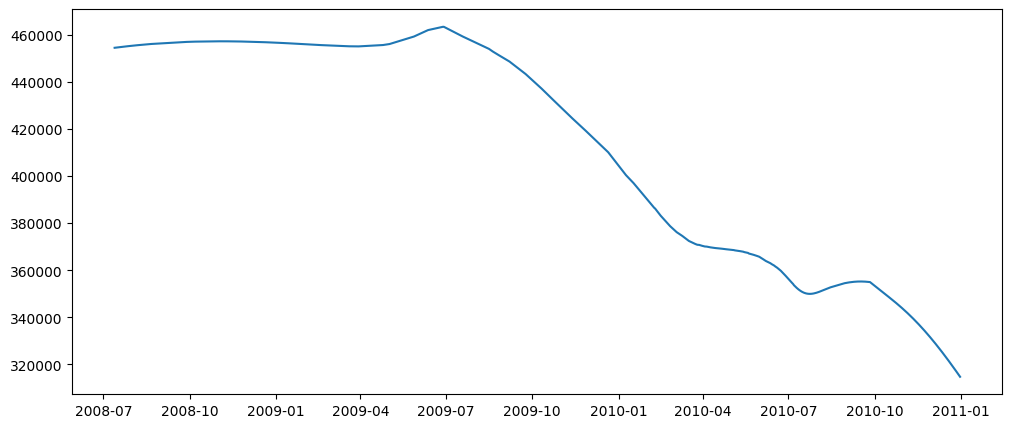

In [47]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(df['BORE_GAS_VOL'],df['DATEPRD'].astype('int64'), frac=0.5)
lowsX, lowsY = lowess.T
lowsX = pd.to_datetime(lowsX)
plt.figure(figsize=(12, 5))
plt.plot(lowsX, lowsY, label="Lowess Method")
plt.show()

In [48]:
newcolumn = lowess[:, 1]
df['BGV Smoothed'] = newcolumn
df[['BORE_GAS_VOL','BGV Smoothed']].describe().T

,count,mean,std,min,25%,50%,75%,max
BORE_GAS_VOL,354.0,368930.9018926554,105394.7094172616,18731.260000000,324110.8700000000,361517.8700000000,402521.4825000000,773865.6000000000
BGV Smoothed,354.0,374456.7380601921,43125.1629935952,314717.344466061,350145.8604576658,360285.7898562193,371114.6566732436,463539.2261092301


In [49]:
from scipy.optimize import curve_fit

In [50]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE,BGV Smoothed
5118,2008-07-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,260.8668745833,...,%,100.7149193750,52.3818987500,69.5394129167,1735.26,252235.23,4.00,production,OP,454609.4134957617
5119,2008-07-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,5.57,256.2482298743,...,%,99.5983177379,71.1153522442,68.0161671095,592.36,88949.00,1.37,production,OP,454659.9381942545
5120,2008-07-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,254.9827846809,...,%,98.6499406383,67.5907531915,66.9488838298,2532.21,373786.28,5.84,production,OP,454709.9997958657
5121,2008-07-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,251.4759208333,...,%,95.6587337500,73.7822514583,63.6638122917,3030.71,447840.09,9.13,production,OP,454759.5963701798
5122,2008-07-17,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,249.3461908333,...,%,93.5852518750,78.0354404167,61.3376995833,3288.08,474614.43,7.58,production,OP,454808.7261491615


In [51]:
df['day'] = range(0, len(df))

In [52]:
x_data = df['day'].to_numpy()
y_data = df['BGV Smoothed'].to_numpy()

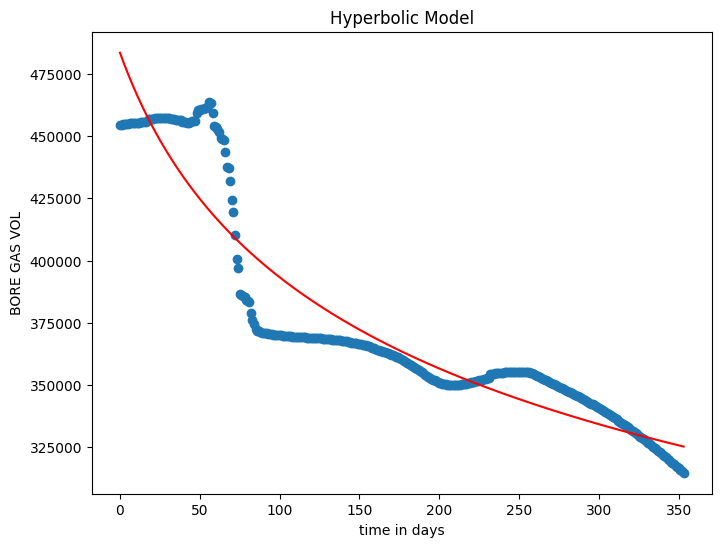

Hyperbolic Model Parameters:
qi: 483542.47958131507
Di: 0.0036813362386170817
b : 5.140189103965551


In [53]:
#=======================================================
def hyperbolic_decline(x, qi, Di, b):
    return qi / (1 + b * Di * x)**(1/b)
#=======================================================
popt, pcov = curve_fit(hyperbolic_decline, x_data, y_data, p0=[3000, 0.001, 0.5])
qi_opt, Di_opt, b_opt = popt 
#=======================================================
x_model = np.linspace(min(x_data), max(x_data), 500)
y_model = hyperbolic_decline(x_model, qi_opt, Di_opt, b_opt)
#=======================================================
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data,)
plt.plot(x_model, y_model,color="red")
plt.xlabel("time in days")
plt.ylabel("BORE GAS VOL") 
plt.title("Hyperbolic Model")
plt.show()
print("Hyperbolic Model Parameters:")
print(f"qi: {qi_opt}")
print(f"Di: {Di_opt}")
print(f"b : {b_opt}")


## **Exercise 13**: <span style="font-weight:800"> Predict

- Time to reach 16500 rate
- Cumulative production at that time

In [54]:
df = pd.read_excel('Volve production data.xlsx')

In [55]:
df = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS            523
AVG_CHOKE_SIZE_P             196
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [56]:
df = df.drop('BORE_WI_VOL', axis=1)
df = df.dropna(subset=['AVG_ANNULUS_PRESS'])
df = df.fillna(df['AVG_CHOKE_SIZE_P'].median())
df['day'] = range(0, len(df))
df = df[df['BORE_GAS_VOL']>0]

In [57]:
df.isnull().sum()

DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
WELL_TYPE                   0
day                         0
dtype: int64

In [58]:
df= df[['BORE_GAS_VOL','day']]

In [59]:
df = df.iloc[1:].reset_index(drop=True)
df

,BORE_GAS_VOL,day
0,88949.00,149
1,373786.28,150
2,447840.09,151
3,474614.43,152
4,399221.04,153
...,...,...
2219,16681.29,2462
2220,18753.12,2463
2221,17979.28,2464
2222,18543.76,2465


In [60]:
df['day'].describe().T

count    2224.0000000000
mean     1322.3417266187
std       672.8757481951
min       149.0000000000
25%       735.7500000000
50%      1339.5000000000
75%      1906.2500000000
max      2466.0000000000
Name: day, dtype: float64

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb
import catboost as cb
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [62]:
X = df[['BORE_GAS_VOL']] 
y = df['day']
y = y.to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
XGBRegressor = XGBRegressor(n_estimators = 500,max_depth=6,)
Model = XGBRegressor 
print(f'for Model {str(Model).split("(")[0]}')
Model.fit(X_train, y_train)
print(f'Train Score is : {Model.score(X_train, y_train)}')
print(f'Test Score is : {Model.score(X_test, y_test)}')
y_pred = Model.predict(X_test)
print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')

for Model XGBRegressor
Train Score is : 0.9234551191329956
Test Score is : 0.9223343729972839
MSE value is  : 36252.64222034323


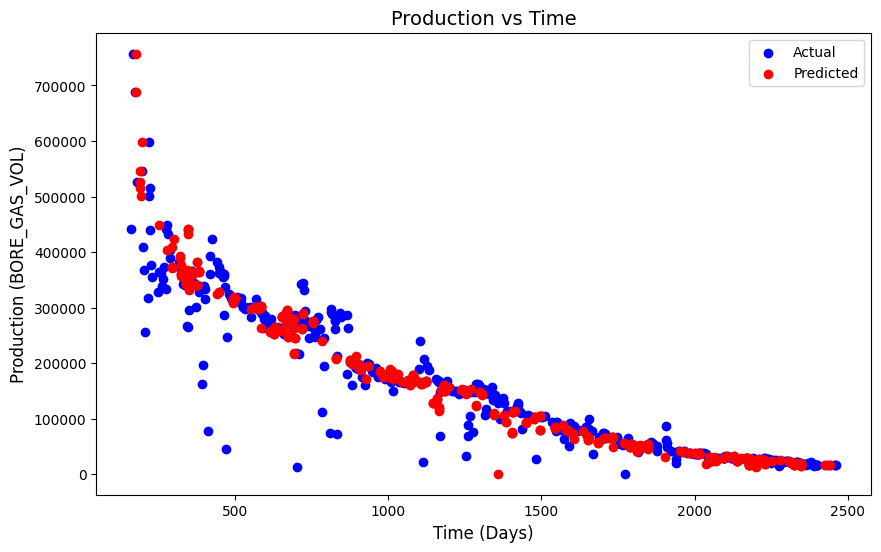

Predicted Time to reach 16500 rate: 2441.57 days
Cumulative Production at that time: 341870597.26


In [71]:
GAS_VOL_target = 16500
GAS_VOL_target_df = pd.DataFrame({'BORE_GAS_VOL': [GAS_VOL_target]})
predicted_time = Model.predict(GAS_VOL_target_df)[0]
cumulative_production = df[df['day'] <= predicted_time]['BORE_GAS_VOL'].sum()
plt.figure(figsize=(10, 6))
plt.scatter( y_test,X_test['BORE_GAS_VOL'], label='Actual', color='blue')
plt.scatter( y_pred, X_test['BORE_GAS_VOL'], label='Predicted', color='red')
plt.title('Production vs Time', fontsize=14)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Production (BORE_GAS_VOL)', fontsize=12)
plt.legend()
plt.show()
print(f"Predicted Time to reach {GAS_VOL_target} rate: {predicted_time} days")
print(f"Cumulative Production at that time: {cumulative_production}")

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'Elephant'">THANK YOU</br></br>SEE YOU IN THE NEXT STAGE </div>